/Users/bencunningham/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


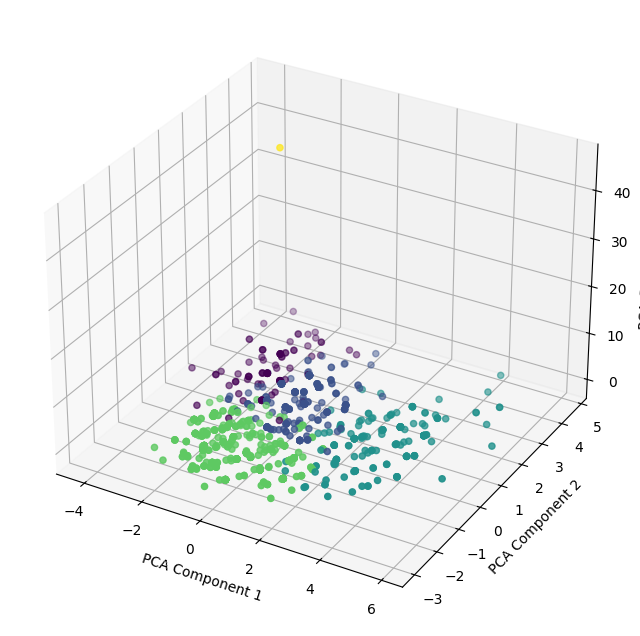

In [10]:
from data_cleaning import ratings_df, watchlist_df 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

main_features = ratings_df[["Your Rating", 'IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated']]
genres = ratings_df[[ 'Action', 'Adventure', 'Animation','Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family','Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']]

scaler = StandardScaler()
genres_scaled = scaler.fit_transform(genres)

n_clusters = 5

kmeans_genre = KMeans(n_clusters=n_clusters, random_state=42)
genre_labels = kmeans_genre.fit_predict(genres_scaled)

# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=3)
genres_pca = pca.fit_transform(genres_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(genres_pca[:, 0], genres_pca[:, 1], genres_pca[:, 2], c=genre_labels, cmap='viridis')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

Index(['Your Rating', 'Date Rated', 'Title', 'IMDb Rating', 'Runtime (mins)',
       'Year', 'Num Votes', 'Day_Rated', 'Action', 'Adventure', 'Animation',
       'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Game-Show', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport',
       'Thriller', 'War', 'Western', 'movie', 'tvMiniSeries', 'tvMovie',
       'tvSeries', 'video', 'videoGame'],
      dtype='object')
[0 9 4 ... 6 2 5]


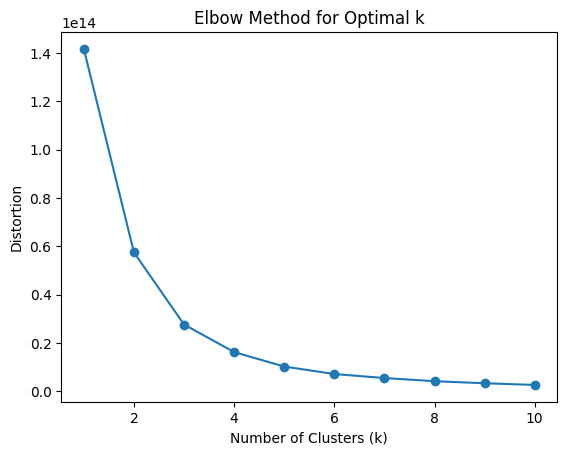

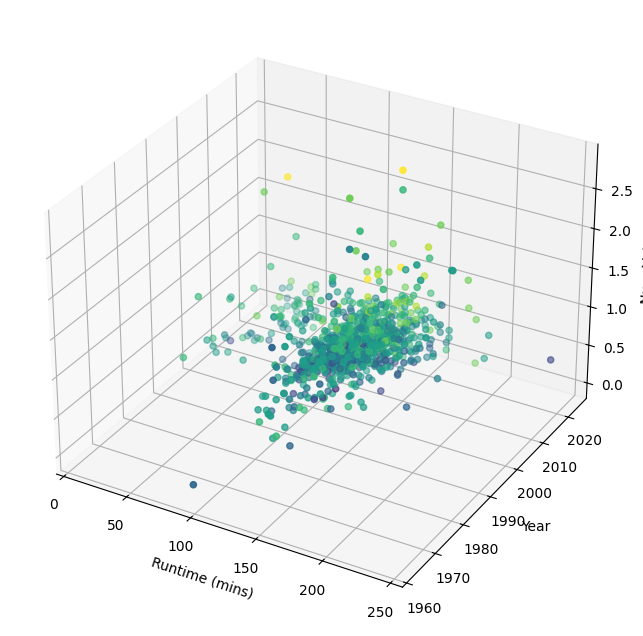

In [11]:
from data_cleaning import ratings_df, watchlist_df, valid_int
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X = ratings_df[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Day_Rated']]


print(ratings_df.columns)
model = KMeans(n_clusters=10, random_state=42, n_init=10) # Setting n_init=10 to ensure code behaves consistlenty after scikit-learn module gets updated 
model.fit(X)

#? Come back to step 10 if I get stuck!
print(model.predict(X))

distortions = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ratings_df['Runtime (mins)'], ratings_df['Year'], ratings_df['Num Votes'], c=ratings_df["Your Rating"], cmap='viridis')
ax.set_xlabel('Runtime (mins)')
ax.set_ylabel('Year')
ax.set_zlabel('Num Votes')
plt.show()
